<h1>An Analysis of Pokemon Types in Relation to Stats</h1>

In [1]:
#imported libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 24)

<p>Here we are importing the csv into a data frame for which we can begin analysis.</p>

In [2]:
#Importing the data
poke = pd.read_csv('pokemon.csv')

<p>As we can see here, all pokemon have certain types, with many also having a second type, along with a certain base total of stats measuring roughly how strong that pokemon is in relation to others. In order to find the strongest types, we need to measure type1, type2, and both types combined in relation to base_total.</p> 

In [3]:
poke

,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,abilities,against_bug,...,base_egg_steps,base_happiness,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,generation,is_legendary
0,Bulbasaur,grass,poison,318,45,49,49,65,65,45,"['Overgrow', 'Chlorophyll']",1.00,...,5120,70,45,Seed Pokémon,1059860,0.7,Fushigidaneフシギダネ,88.1,1,6.9,1,0
1,Ivysaur,grass,poison,405,60,62,63,80,80,60,"['Overgrow', 'Chlorophyll']",1.00,...,5120,70,45,Seed Pokémon,1059860,1.0,Fushigisouフシギソウ,88.1,2,13.0,1,0
2,Venusaur,grass,poison,625,80,100,123,122,120,80,"['Overgrow', 'Chlorophyll']",1.00,...,5120,70,45,Seed Pokémon,1059860,2.0,Fushigibanaフシギバナ,88.1,3,100.0,1,0
3,Charmander,fire,NaN,309,39,52,43,60,50,65,"['Blaze', 'Solar Power']",0.50,...,5120,70,45,Lizard Pokémon,1059860,0.6,Hitokageヒトカゲ,88.1,4,8.5,1,0
4,Charmeleon,fire,NaN,405,58,64,58,80,65,80,"['Blaze', 'Solar Power']",0.50,...,5120,70,45,Flame Pokémon,1059860,1.1,Lizardoリザード,88.1,5,19.0,1,0
5,Charizard,fire,flying,634,78,104,78,159,115,100,"['Blaze', 'Solar Power']",0.25,...,5120,70,45,Flame Pokémon,1059860,1.7,Lizardonリザードン,88.1,6,90.5,1,0
6,Squirtle,water,NaN,314,44,48,65,50,64,43,"['Torrent', 'Rain Dish']",1.00,...,5120,70,45,Tiny Turtle Pokémon,1059860,0.5,Zenigameゼニガメ,88.1,7,9.0,1,0
7,Wartortle,water,NaN,405,59,63,80,65,80,58,"['Torrent', 'Rain Dish']",1.00,...,5120,70,45,Turtle Pokémon,1059860,1.0,Kameilカメール,88.1,8,22.5,1,0
8,Blastoise,water,NaN,630,79,103,120,135,115,78,"['Torrent', 'Rain Dish']",1.00,...,5120,70,45,Shellfish Pokémon,1059860,1.6,Kamexカメックス,88.1,9,85.5,1,0
9,Caterpie,bug,NaN,195,45,30,35,20,20,45,"['Shield Dust', 'Run Away']",1.00,...,3840,70,255,Worm Pokémon,1000000,0.3,Caterpieキャタピー,50.0,10,2.9,1,0


<p>Here we are filling in all NaN values with empty strings so that we can add the types without single type pokemon resolving to NaN. </p>

In [4]:
poke.fillna('', inplace = True)

<p>Next we can write a function to add the types of every pokemon and create a combined column.</p>

In [5]:
def combined_type(row):
    val = ''
    if row['type2'] == '':
        val = row['type1']
    else:
         val = row['type1'] + ' ' + row['type2']
    return val

In [6]:
poke['combined'] = poke.apply(combined_type, axis = 1)

<p>We're going to use a version of the data frame without legendary pokemon as they're considered exceptions within the pokemon universe and would create data outside of what pokemon can normally be acquired.</p>

In [7]:
poke_nolegend = poke[poke['is_legendary'] == 0]

<p>Now we can get the average stats of every type of pokemon, including unique combination of multiple types. </p>

In [8]:
poke_type1 = poke_nolegend.groupby(['type1']).mean()
poke_type2 = poke_nolegend.groupby(['type2']).mean()
poke_type_combined = poke_nolegend.groupby(['combined']).mean()

#It should be mentioned that we're not including legendary pokemon as they're meant to be stronger than the rest and would change the data.

<p>So here we have the base totals of every pure type, secondary type, and type combination. </p>

In [9]:
poke_type1.sort_values(by = ['base_total'], ascending = False)

,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,against_dark,against_dragon,against_electric,against_fairy,...,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_egg_steps,base_happiness,experience_growth,pokedex_number,generation,is_legendary
type1,,,,,,,,,,,,,,,,,,,,,,,,,
dragon,458.350000,67.500000,98.650000,78.900000,70.400000,74.900000,68.000000,0.875000,0.950000,2.000000,0.500000,2.200000,...,1.000000,0.925000,1.100000,1.025000,1.000000,0.575000,9856.000000,49.000000,1.205000e+06,507.200000,4.300000,0.0
steel,454.888889,58.611111,91.833333,120.444444,60.722222,74.166667,49.111111,0.555556,1.388889,0.444444,1.000000,0.500000,...,0.375000,0.000000,0.430556,0.513889,0.638889,1.222222,6755.555556,58.333333,1.084977e+06,455.444444,4.000000,0.0
fire,433.893617,65.787234,78.574468,64.553191,84.617021,68.297872,72.063830,0.468085,0.946809,1.021277,1.031915,0.585106,...,0.989362,0.968085,1.095745,2.000000,0.510638,2.106383,5147.234043,70.000000,1.045026e+06,377.170213,3.702128,0.0
rock,431.634146,64.756098,88.731707,94.756098,59.390244,70.024390,53.975610,1.024390,1.024390,0.987805,1.048780,1.036585,...,0.481707,0.463415,0.914634,1.085366,1.926829,2.048780,6618.536585,67.439024,9.529029e+05,407.292683,3.658537,0.0
dark,430.500000,64.807692,85.538462,69.500000,69.153846,67.769231,73.730769,1.730769,0.538462,1.076923,1.096154,2.230769,...,0.923077,0.903846,0.000000,1.230769,1.000000,1.019231,5809.230769,47.115385,1.085726e+06,469.384615,4.115385,0.0
ghost,425.269231,60.038462,70.923077,78.730769,81.000000,77.461538,57.115385,0.528846,1.923077,0.961538,0.903846,0.923077,...,0.000000,0.567308,1.076923,1.153846,0.980769,1.096154,5809.230769,60.576923,1.009198e+06,499.269231,4.384615,0.0
ice,419.666667,70.857143,73.857143,69.238095,75.523810,67.904762,62.285714,1.047619,1.142857,1.000000,1.047619,1.000000,...,0.952381,0.904762,0.952381,1.952381,1.857143,1.071429,5485.714286,68.333333,1.070456e+06,441.952381,3.714286,0.0
electric,415.588235,57.294118,67.000000,59.558824,81.205882,68.117647,82.411765,0.897059,1.014706,0.911765,0.514706,0.941176,...,0.911765,0.897059,0.941176,0.970588,0.485294,1.000000,4969.411765,71.764706,1.047328e+06,359.205882,3.323529,0.0
water,415.500000,69.018519,71.898148,71.916667,71.287037,69.166667,62.212963,1.032407,1.027778,0.976852,1.907407,1.037037,...,0.958333,0.962963,0.972222,1.060185,0.539352,0.550926,5262.222222,69.351852,1.045978e+06,332.009259,3.157407,0.0


In [10]:
poke_type2.sort_values(by = ['base_total'], ascending = False)

,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,against_dark,against_dragon,against_electric,against_fairy,...,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_egg_steps,base_happiness,experience_growth,pokedex_number,generation,is_legendary
type2,,,,,,,,,,,,,,,,,,,,,,,,,
fighting,480.210526,75.368421,107.473684,80.263158,72.000000,73.842105,71.263158,0.526316,0.500000,1.105263,0.947368,2.000000,...,1.000000,1.052632,1.947368,0.684211,0.815789,1.184211,5254.736842,67.894737,1.111520e+06,478.736842,4.526316,0.0
steel,470.055556,62.500000,89.777778,105.500000,70.055556,84.722222,57.500000,0.597222,0.916667,0.500000,0.833333,0.583333,...,0.458333,0.000000,0.472222,0.583333,0.513889,1.138889,5333.333333,66.111111,9.622067e+05,453.000000,4.000000,0.0
ice,451.285714,77.000000,86.428571,81.357143,64.857143,74.785714,66.857143,1.178571,0.892857,1.000000,1.000000,1.142857,...,0.928571,1.000000,0.928571,1.714286,1.714286,1.250000,5851.428571,65.000000,1.079980e+06,297.928571,2.857143,0.0
dragon,449.769231,68.384615,80.230769,81.230769,79.923077,73.692308,66.307692,1.076923,0.884615,2.000000,0.538462,2.307692,...,0.923077,0.807692,0.846154,1.153846,1.076923,0.673077,6695.384615,61.923077,1.066902e+06,604.615385,5.153846,0.0
rock,446.071429,69.500000,86.857143,131.142857,51.857143,70.714286,36.000000,0.857143,1.000000,0.892857,1.071429,0.857143,...,0.446429,0.339286,0.892857,1.071429,1.428571,2.285714,6674.285714,62.500000,1.114990e+06,347.785714,3.142857,0.0
dark,444.952381,70.047619,95.904762,67.238095,72.666667,62.238095,76.857143,1.809524,0.607143,1.000000,0.976190,1.714286,...,0.928571,0.952381,0.190476,0.952381,0.928571,1.071429,5180.952381,63.333333,1.100899e+06,368.142857,3.523810,0.0
psychic,439.360000,68.840000,70.520000,81.400000,76.080000,79.720000,62.800000,2.000000,1.840000,0.900000,1.080000,1.040000,...,0.860000,0.800000,0.450000,0.940000,0.940000,1.060000,5888.000000,65.800000,1.056394e+06,351.840000,3.160000,0.0
fire,433.636364,64.636364,58.000000,69.090909,98.363636,71.818182,71.727273,0.522727,1.181818,1.000000,0.909091,0.590909,...,0.727273,0.727273,1.000000,2.227273,0.545455,2.000000,6050.909091,63.636364,1.112676e+06,520.818182,4.454545,0.0
electric,429.625000,77.875000,65.375000,65.625000,82.750000,72.000000,66.000000,1.000000,1.000000,1.000000,0.562500,1.000000,...,1.000000,0.937500,1.000000,1.437500,0.437500,1.000000,4480.000000,70.000000,1.062500e+06,456.375000,4.250000,0.0


In [11]:
poke_type_combined.sort_values(by = ['base_total'], ascending = False)

,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,against_dark,against_dragon,against_electric,against_fairy,...,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_egg_steps,base_happiness,experience_growth,pokedex_number,generation,is_legendary
combined,,,,,,,,,,,,,,,,,,,,,,,,,
rock dark,700.000000,100.000000,164.000000,150.000000,95.000000,120.000000,71.000000,2.00,0.50,1.0,1.0,2.0,...,0.5,0.50,0.0,1.00,2.00,2.00,10240.000000,35.000000,1.250000e+06,248.000000,2.000000,0.0
dragon flying,630.000000,87.000000,129.666667,111.666667,110.000000,98.333333,93.333333,0.50,1.00,2.0,1.0,2.0,...,1.0,1.00,1.0,2.00,1.00,0.50,8533.333333,46.666667,1.033333e+06,285.333333,2.333333,0.0
fighting steel,625.000000,70.000000,145.000000,88.000000,140.000000,70.000000,112.000000,0.25,0.50,0.5,1.0,1.0,...,0.5,0.00,1.0,0.25,0.50,1.00,6400.000000,70.000000,1.059860e+06,448.000000,4.000000,0.0
psychic fighting,618.000000,68.000000,165.000000,95.000000,65.000000,115.000000,110.000000,1.00,1.00,1.0,1.0,2.0,...,1.0,1.00,1.0,0.50,1.00,1.00,5120.000000,35.000000,1.250000e+06,475.000000,4.000000,0.0
steel ground,610.000000,75.000000,125.000000,230.000000,55.000000,95.000000,30.000000,0.50,1.00,0.5,0.0,0.5,...,0.5,0.00,0.5,0.25,0.50,2.00,6400.000000,70.000000,1.000000e+06,208.000000,2.000000,0.0
bug fighting,600.000000,80.000000,185.000000,115.000000,40.000000,105.000000,75.000000,0.50,0.50,1.0,1.0,2.0,...,1.0,1.00,2.0,1.00,1.00,1.00,6400.000000,70.000000,1.250000e+06,214.000000,2.000000,0.0
fire fire,540.000000,105.000000,30.000000,105.000000,140.000000,105.000000,55.000000,0.50,1.00,1.0,1.0,0.5,...,1.0,1.00,1.0,2.00,0.50,2.00,5120.000000,70.000000,1.059860e+06,555.000000,5.000000,0.0
water dragon,540.000000,75.000000,95.000000,95.000000,95.000000,95.000000,85.000000,1.00,1.00,2.0,1.0,2.0,...,1.0,1.00,1.0,1.00,0.50,0.25,5120.000000,70.000000,1.000000e+06,230.000000,2.000000,0.0
fire psychic,534.000000,75.000000,69.000000,72.000000,114.000000,100.000000,104.000000,1.00,2.00,1.0,1.0,0.5,...,1.0,1.00,0.5,2.00,0.50,2.00,5120.000000,70.000000,1.059860e+06,655.000000,6.000000,0.0


<p> ...Also in bar plots. </p>

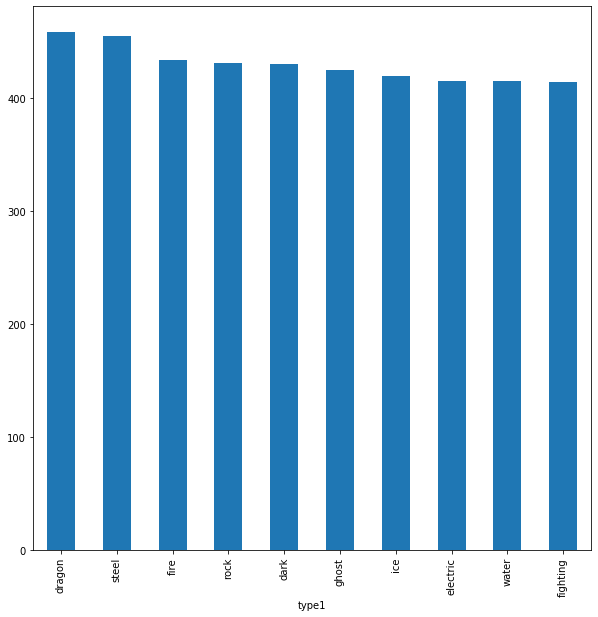

In [12]:
poke_type1['base_total'].sort_values(ascending = False).head(10).plot(figsize = (10, 10), kind = 'bar')

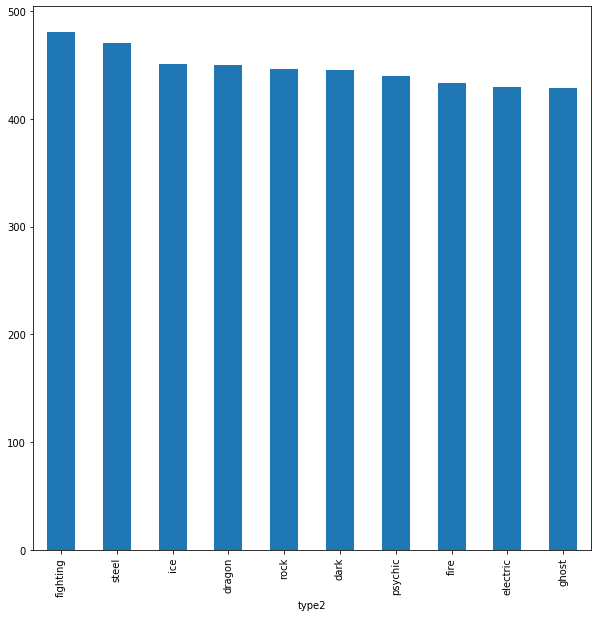

In [13]:
poke_type2['base_total'].sort_values(ascending = False).head(10).plot(figsize = (10, 10), kind = 'bar')

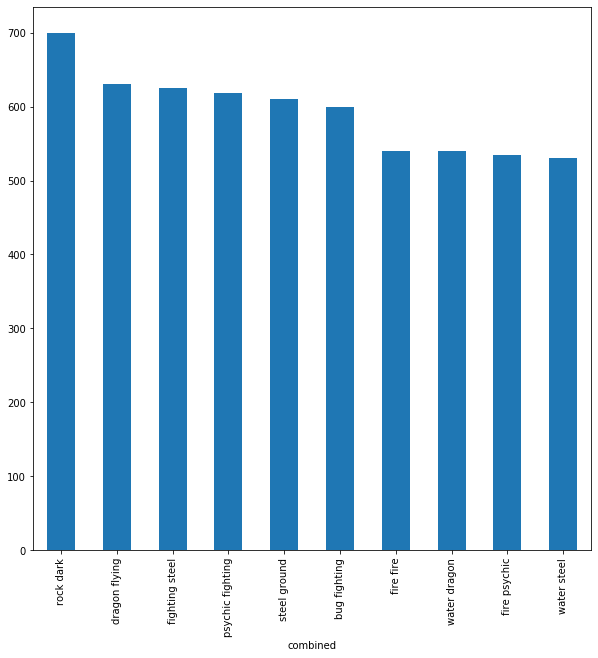

In [14]:
poke_type_combined['base_total'].sort_values(ascending = False).head(10).plot(figsize = (10, 10), kind = 'bar')

<p>One extra snippet of data. If we sort by highest base total stats, we can see that--when measuring by pure strength--the strongest pokemon team includes Salamence, Metagross, Garchomp, Tyranitar, Slaking, and Gyarados. </p>

In [15]:
poke_nolegend.sort_values(by = ['base_total'], ascending = False)

,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,abilities,against_bug,...,base_happiness,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,generation,is_legendary,combined
372,Salamence,dragon,flying,700,95,145,130,120,90,120,"['Intimidate', 'Moxie']",0.50,...,35,45,Dragon Pokémon,1250000,1.5,Bohmanderボーマンダ,50,373,102.6,3,0,dragon flying
375,Metagross,steel,psychic,700,80,145,150,105,110,110,"['Clear Body', 'Light Metal']",1.00,...,35,3,Iron Leg Pokémon,1250000,1.6,Metagrossメタグロス,,376,550,3,0,steel psychic
444,Garchomp,dragon,ground,700,108,170,115,120,95,92,"['Sand Veil', 'Rough Skin']",1.00,...,70,45,Mach Pokémon,1250000,1.9,Gaburiasガブリアス,50,445,95,4,0,dragon ground
247,Tyranitar,rock,dark,700,100,164,150,95,120,71,"['Sand Stream', 'Unnerve']",2.00,...,35,45,Armor Pokémon,1250000,2,Bangirasバンギラス,50,248,202,2,0,rock dark
288,Slaking,normal,,670,150,160,100,95,65,100,['Truant'],1.00,...,70,45,Lazy Pokémon,1250000,2,Kekkingケッキング,50,289,130.5,3,0,normal
129,Gyarados,water,flying,640,95,155,109,70,130,81,"['Intimidate', 'Moxie']",0.50,...,70,45,Atrocious Pokémon,1250000,6.5,Gyaradosギャラドス,50,130,235,1,0,water flying
657,Greninja,water,dark,640,72,145,67,153,71,132,"['Torrent', 'Protean', 'Battle Bond']",2.00,...,70,45,Ninja Pokémon,1059860,1.5,Gekkougaゲッコウガ,88.1,658,40,6,0,water dark
259,Swampert,water,ground,635,100,150,110,95,110,70,"['Torrent', 'Damp']",1.00,...,70,45,Mud Fish Pokémon,1059860,1.5,Laglargeラグラージ,88.1,260,81.9,3,0,water ground
5,Charizard,fire,flying,634,78,104,78,159,115,100,"['Blaze', 'Solar Power']",0.25,...,70,45,Flame Pokémon,1059860,1.7,Lizardonリザードン,88.1,6,90.5,1,0,fire flying
305,Aggron,steel,rock,630,70,140,230,60,80,50,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.50,...,35,45,Iron Armor Pokémon,1250000,2.1,Bossgodoraボスゴドラ,50,306,360,3,0,steel rock
